<a href="https://colab.research.google.com/github/Shubhu1111/Exploratory-Data-Analysis-of-Flipkart-Products/blob/main/Exploratory_Data_Analysis_of_Flipkart_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of Flipkart Products**

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Shubham Singh

Flipkart, founded in 2007 by Sachin Bansal and Binny Bansal, two former Amazon employees, is currently the biggest E-commerce website in India. Initially, Flipkart was a platform for selling books, but it later expanded to include other products like electronics, clothing, and various other consumables. If you're interested in learning more about Flipkart, you can visit their Wikipedia page. Additionally, I obtained this dataset from Kaggle.

### **The objectives of this analysis are as follows:**

---


- To explore the structure of the data
- To identify any patterns within the data
- To investigate missing values and address any issues related to them
- To prepare the data for analysis
- To gain insights into the monthly sales data
- To analyze the discounts on products and identify any trends
- To determine which product categories performed better in terms of sales.

## **Data wrangling**
### <b> Cleaning data </b> 

Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

While cleaning data we will perform following steps: \
1) Remove duplicate rows  \
2) Handling missing values.  \
3) Convert columns to appropriate datatypes.  \
4) Adding important columns

## **Important libraries**

In this exploratory analysis the following libraries has used:-


**Numpy**

**Pandas**

**Matplotlib**

**Seaborn**

**Plotly**


## **The following graphs and plots have been used, along with their descriptions:**
1. **Heatmap**: A graphical representation of data where the individual values are represented as colors on a matrix. Heatmaps are commonly used to visualize large datasets and identify patterns or correlations within the data.

2. **Barplot**: A graph that uses rectangular bars to represent the values of variables. Barplots are commonly used to compare the values of different categories or groups of data.

3. **Pie Chart**: A circular graph that is divided into sectors, each representing a proportion of the whole. Pie charts are commonly used to show the relative sizes of different parts of a dataset.

4. **Line Chart**: A graph that displays data as a series of data points connected by lines. Line charts are commonly used to show trends or changes in data over time, and to compare the values of different variables.

### **Let's list down the objectives to work on.**

- What is the costliest product sold?
- What is the cheapest product sold?
- Which product sold at the highest discount?
- How are the discounts provided based on categories?
- How are the sales distributed across time periods (yearly and monthly)? 

# ***Let's Begin !***

# Importing Libraries & Data 

In [1]:
# Import necessary libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import plotly.graph_objs as go


# Display visualizations inline
%matplotlib inline

# Ignore warning messages
warnings.filterwarnings('ignore')


In [2]:
# Mount Google Drive in Colab
drive.mount('/content/drive')

# Define the path of the CSV file containing the Flipkart dataset
path = '/content/drive/MyDrive/Data/Flipkart_dataset.csv'

# Load the dataset into a Pandas dataframe
dataset = pd.read_csv(path)


Mounted at /content/drive


In [3]:
# View the top 10 rows of data in the dataframe using the Pandas head() function
dataset.head(n=10) # or dataset.head() for 5 elements by default

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

# **Basic Information and understanding of the Data Frame(dataset).**

In [4]:
# Read the name of columns in the dataset using the columns attribute of the Pandas dataframe
dataset.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [5]:
# Check the information of each data column using the Pandas info() function
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [6]:
# Display the shape of the dataframe using the shape attribute
dataset.shape

(20000, 15)

In [7]:
# Creating a new copy of the dataset for making suitable changes.
df = dataset.copy()
df.head()


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [8]:
# Check the number of null values in each column of the dataset and calculate its percentage
null_counts = dataset.isnull().sum()
null_percentages = (null_counts / len(dataset)) * 100

# Print the results
print("Number of null values in each column:\n", null_counts)
print("\nPercentage of null values in each column:\n", null_percentages)

Number of null values in each column:
 uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

Percentage of null values in each column:
 uniq_id                     0.000
crawl_timestamp             0.000
product_url                 0.000
product_name                0.000
product_category_tree       0.000
pid                         0.000
retail_price                0.390
discounted_price            0.390
image                       0.015
is_FK_Advantage_product     0.000
description                 0.010
product_rating              0.000
overall_rating  

<Axes: >

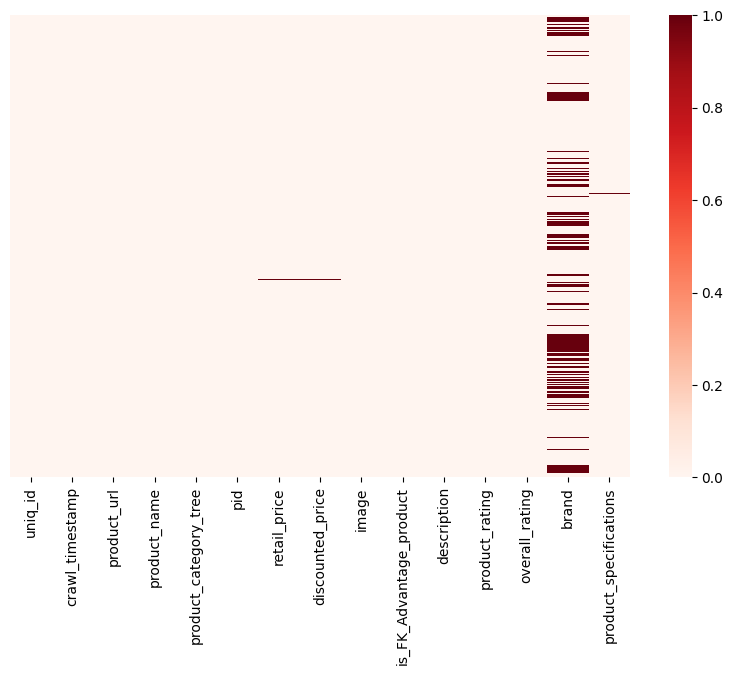

In [9]:
# Calculate the percentage of missing data in each column of the dataset
data_missing = dataset.isnull().sum() * 100 / len(dataset)

# Type-1 of visualizing the missing data using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(), yticklabels=False, cmap='Reds')

<Axes: >

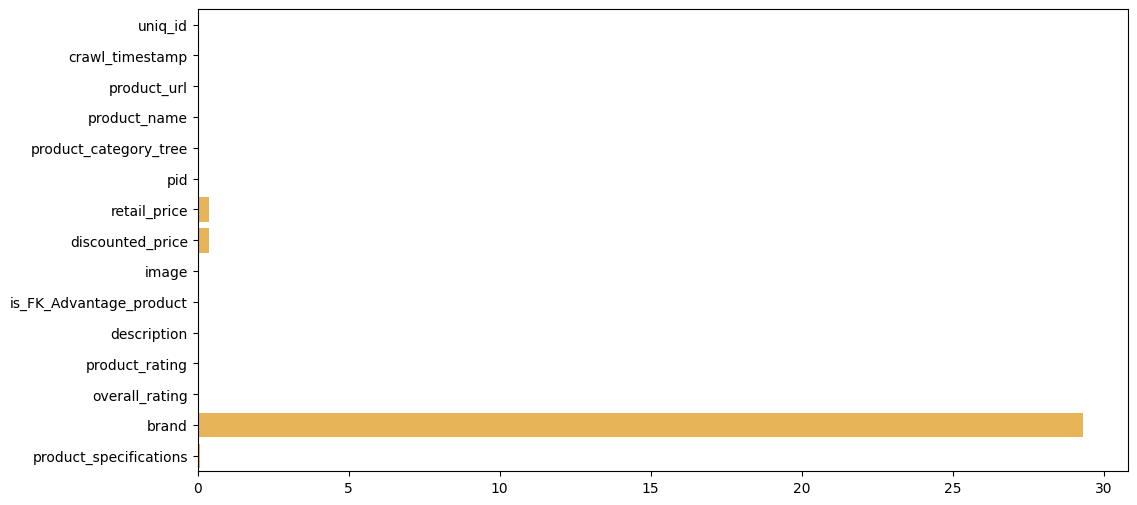

In [10]:
# Type - 2
# Visualize the percentage of missing data using a horizontal bar plot with a different color
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=data_missing.values, y=data_missing.index, color='orange', alpha=0.75)



# **Data Preparation & Data Cleaning**
Based on the visualizations, we have observed that there is a significant amount of missing data in the Brand column. Therefore, we will drop the Brand column to avoid further obstacles during data analysis.

In [11]:
# Drop the 'brand' column from the dataframe
df.drop(labels='brand', axis=1, inplace=True)

# Print the head of the dataframe to verify that the 'brand' column has been dropped
df.head()

# Now we can see that the 'brand' column is no longer available in the dataframe


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Pet Type"",..."


### We will perform a column-by-column study to observe the patterns in the data and clean it if necessary.

In [12]:
# Print the unique values present in the dataframe
cols = df.columns
def unique_values():
    for i in np.arange(0, len(cols)):
        print("There are {} unique values in the '{}' column out of {}.".format(df[cols[i]].nunique(), cols[i], len(df)))
unique_values()


There are 20000 unique values in the 'uniq_id' column out of 20000.
There are 371 unique values in the 'crawl_timestamp' column out of 20000.
There are 20000 unique values in the 'product_url' column out of 20000.
There are 12676 unique values in the 'product_name' column out of 20000.
There are 6466 unique values in the 'product_category_tree' column out of 20000.
There are 19998 unique values in the 'pid' column out of 20000.
There are 2247 unique values in the 'retail_price' column out of 20000.
There are 2448 unique values in the 'discounted_price' column out of 20000.
There are 18589 unique values in the 'image' column out of 20000.
There are 2 unique values in the 'is_FK_Advantage_product' column out of 20000.
There are 17539 unique values in the 'description' column out of 20000.
There are 36 unique values in the 'product_rating' column out of 20000.
There are 36 unique values in the 'overall_rating' column out of 20000.
There are 18825 unique values in the 'product_specificatio

### **Take a look at the first element of this column's data**

### **Column: crawl_timestamp**

In [13]:
df['crawl_timestamp'][0]

'2016-03-25 22:59:23 +0000'

Let's convert this timestamp into year and month for analysis.

In [14]:
# Convert the 'crawl_timestamp' column into a datetime type for better workability
df['crawl_timestamp'] = pd.to_datetime(df['crawl_timestamp'])

# Create a new column 'sale_year' to extract the year from the 'crawl_timestamp' column
# We will drop or utilize this timestamp later
df['sale_year'] = df['crawl_timestamp'].apply(lambda x: x.year)

# Create a new column 'sale_month' to extract the month from the 'crawl_timestamp' column
# We will drop or utilize this timestamp later
df['sale_month'] = df['crawl_timestamp'].apply(lambda x: x.month)

### **Column: product_name**

In [15]:
df['product_name'].value_counts()[:10]

TheLostPuppy Back Cover for Apple iPad Air                       134
TheLostPuppy Back Cover for Apple iPad Air 2                      95
S4S Stylish Women's Push-up Bra                                   94
Voylla Metal, Alloy Necklace                                      66
WallDesign Small Vinyl Sticker                                    65
HomeeHub Polyester Multicolor Self Design Eyelet Door Curtain     58
DailyObjects Back Cover for Apple iPad 2/3/4                      52
Nimya Solid Men's Polo Neck T-Shirt                               50
S4S Comfortable Women's Full Coverage Bra                         45
Grafion by Grafion - Comfort Feel Women's Full Coverage Bra       44
Name: product_name, dtype: int64

The products listed above are the top 10 best-selling items based on the observed data.

### **Column: product_category_tree**

In [16]:
df['product_category_tree'][0]

'["Clothing >> Women\'s Clothing >> Lingerie, Sleep & Swimwear >> Shorts >> Alisha Shorts >> Alisha Solid Women\'s Cycling Shorts"]'

This column data contains both categories and sub-categories, which can be a bit tricky to handle. However, with the use of the split() command, it can be easily divided into sub-categories.

### **To prepare a mockup later, we'll define the categories and include up to three subcategories for each.**

In [17]:
categories = ['Primary_Category', 'Secondary_Category', 'Tertiary_Category', 'Quaternary_Category']

Use a loop to perform categorical splits and include the resulting categories in the DataFrame

In [18]:
def Categorcal_Splits():
    for num in [0,1,2,3]:
        if num == 0:
            df[categories[num]] = df['product_category_tree'].apply(lambda x: x.split('>>')[num])
        elif num == 1:
            df[categories[num]] = df['product_category_tree'].apply(lambda x: x.split('>>')[num:num+1])
        elif num == 2:
            df[categories[num]] = df['product_category_tree'].apply(lambda x: x.split('>>')[num:num+1])
        elif num == 3:
            df[categories[num]] = df['product_category_tree'].apply(lambda x: x.split('>>')[num:num+1])
Categorcal_Splits()

In [19]:
# Let's check the new DataFrame.
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,sale_year,sale_month,Primary_Category,Secondary_Category,Tertiary_Category,Quaternary_Category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,"[""Clothing",[ Women's Clothing ],"[ Lingerie, Sleep & Swimwear ]",[ Shorts ]
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati...",2016,3,"[""Furniture",[ Living Room Furniture ],[ Sofa Beds & Futons ],[ FabHomeDecor Fabric Double Sofa Bed (Finish ...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,"[""Footwear",[ Women's Footwear ],[ Ballerinas ],"[ AW Bellies""]]"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,"[""Clothing",[ Women's Clothing ],"[ Lingerie, Sleep & Swimwear ]",[ Shorts ]
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,"[""Pet Supplies",[ Grooming ],[ Skin & Coat Care ],[ Shampoo ]


We can see that the newly created category columns require further cleaning. To accomplish this, we will define a function to clean each column separately.

In [20]:
# We can perform the operation for each column separately by defining a function.
df['Primary_Category'] = df['Primary_Category'].apply(lambda x: x.split('["')[1])
for i in [1,2,3]:
    df[categories[i]] = df[categories[i]].apply(lambda x: str(x))
    df[categories[i]] = df[categories[i]].apply(lambda x: x[2:-2])


### Now we can view all four columns in a neat and organized format.

In [21]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,product_specifications,sale_year,sale_month,Primary_Category,Secondary_Category,Tertiary_Category,Quaternary_Category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies""]"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


### Let's create a new column for the discount percentage.

In [22]:
df['Discount%'] = round((df['retail_price'] - df['discounted_price'])*100/df['retail_price'], 1)

In [23]:
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,product_specifications,sale_year,sale_month,Primary_Category,Secondary_Category,Tertiary_Category,Quaternary_Category,Discount%
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,62.1
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,29.6
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies""]",50.1
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,61.8
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43+00:00,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2015,12,Baby Care,Baby & Kids Gifts,Stickers,"WallDesign Stickers""]",51.3
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,...,No rating available,No rating available,"{""product_specification""=>[{""key""=>""Number of ...",2015,12,Baby Care,Baby & Kids Gifts,Stickers,"Wallmantra Stickers""]",20.0
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,...,No rating available,No rating available,"{""product_specificatio

# **We will now select the columns that we need to create our final data frame for data analysis.**

In [24]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'product_specifications', 'sale_year', 'sale_month',
       'Primary_Category', 'Secondary_Category', 'Tertiary_Category',
       'Quaternary_Category', 'Discount%'],
      dtype='object')

In [25]:
flipkart_df = df[['product_name','Primary_Category','retail_price','discounted_price','Discount%','sale_month','sale_year',
             'Secondary_Category','Tertiary_Category','Quaternary_Category']]

In [26]:
flipkart_df.head()

,product_name,Primary_Category,retail_price,discounted_price,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
0,Alisha Solid Women's Cycling Shorts,Clothing,999.0,379.0,62.1,3,2016,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,FabHomeDecor Fabric Double Sofa Bed,Furniture,32157.0,22646.0,29.6,3,2016,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...
2,AW Bellies,Footwear,999.0,499.0,50.1,3,2016,Women's Footwear,Ballerinas,"AW Bellies""]"
3,Alisha Solid Women's Cycling Shorts,Clothing,699.0,267.0,61.8,3,2016,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies,220.0,210.0,4.5,3,2016,Grooming,Skin & Coat Care,Shampoo


# **Question 1**

## **What is the costliest product sold?**

In [27]:
flipkart_df[flipkart_df['discounted_price'] == flipkart_df['discounted_price'].max()]

,product_name,Primary_Category,retail_price,discounted_price,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
116,Breitling AB011010/BB08 131S Chronomat 44 Anal...,Watches,571230.0,571230.0,0.0,12,2015,Wrist Watches,"Breitling Wrist Watches""]",


In [28]:
print("The most expensive product available for sale costs Rs.{}".format(int(flipkart_df['discounted_price'].max())))

The most expensive product available for sale costs Rs.571230


# **Question 2**

## **What is the cheapest product sold?**

In [29]:
flipkart_df[flipkart_df['discounted_price'] == flipkart_df['discounted_price'].min()]

,product_name,Primary_Category,retail_price,discounted_price,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
10554,Geol Wooden Wet and Dry Broom,Kitchen & Dining,35.0,35.0,0.0,4,2016,Housekeeping & Laundry,Home Cleaning,Brooms & Brushes


In [30]:
print("The cheapest product available for sale costs Rs.{}".format(int(flipkart_df['discounted_price'].min())))


The cheapest product available for sale costs Rs.35


# **Question 3**

## **How are the sales distributed across time periods (yearly and monthly)?**

In [31]:
# Let us map the month numbers names of month using map function from a dictionary
months = {1 : 'January',
         2 : 'February',
         3 : 'March',
         4 : 'April',
         5 : 'May',
         6 : 'June',
         7 : 'July',
         8 : 'August',
         9 : 'September',
         10 : 'October',
         11: 'November',
         12 : 'December'}

flipkart_df['sale_month'] = flipkart_df['sale_month'].map(months)

# Verify the changes
print(flipkart_df.head())

                            product_name Primary_Category  retail_price  \
0    Alisha Solid Women's Cycling Shorts        Clothing          999.0   
1    FabHomeDecor Fabric Double Sofa Bed       Furniture        32157.0   
2                             AW Bellies        Footwear          999.0   
3    Alisha Solid Women's Cycling Shorts        Clothing          699.0   
4  Sicons All Purpose Arnica Dog Shampoo    Pet Supplies          220.0   

   discounted_price  Discount% sale_month  sale_year       Secondary_Category  \
0             379.0       62.1      March       2016        Women's Clothing    
1           22646.0       29.6      March       2016   Living Room Furniture    
2             499.0       50.1      March       2016        Women's Footwear    
3             267.0       61.8      March       2016        Women's Clothing    
4             210.0        4.5      March       2016                Grooming    

              Tertiary_Category  \
0   Lingerie, Sleep & Swimw

### **Monthly Sales Distribution**

In [32]:
monthly_sales = flipkart_df['sale_month'].value_counts()
monthly_sales

December    10315
January      4850
March        1634
April        1137
June         1046
May           773
February      245
Name: sale_month, dtype: int64

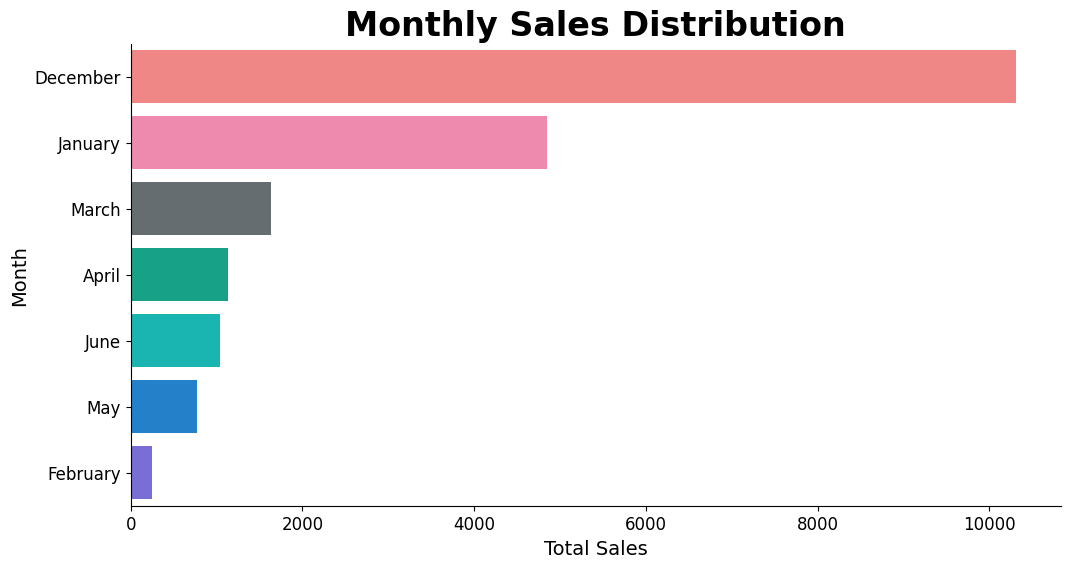

In [33]:
colors = ['#ff7675', '#fd79a8', '#636e72', '#00b894', '#00cec9', '#0984e3', '#6c5ce7', '#a29bfe', '#fdcb6e', '#e17055', '#d63031', '#b2bec3']
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_sales.values, y=monthly_sales.index, palette=colors)
plt.title('Monthly Sales Distribution', fontsize=24, fontweight='bold')
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


### **Yearly Sales Distribution**

In [34]:
yearly_sales = flipkart_df['sale_year'].value_counts()
yearly_sales

2015    10315
2016     9685
Name: sale_year, dtype: int64

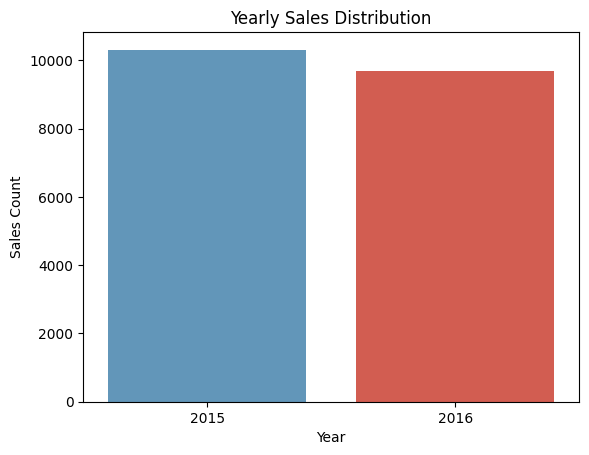

In [35]:
import seaborn as sns

# Define a custom color palette
custom_palette = ['#5499C7', '#E74C3C', '#2ECC71', '#F39C12']

# Create a barplot with the yearly sales data and the custom color palette
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, palette=custom_palette)

# Set the title and axis labels
plt.title('Yearly Sales Distribution')
plt.xlabel('Year')
plt.ylabel('Sales Count')

# Display the plot
plt.show()


# **Question 4**

## **Which product sold at the highest discount?**

In [36]:
flipkart_df[flipkart_df['Discount%'] == flipkart_df['Discount%'].max()]

,product_name,Primary_Category,retail_price,discounted_price,Discount%,sale_month,sale_year,Secondary_Category,Tertiary_Category,Quaternary_Category
17205,Rajcrafts Floral Double Quilts & Comforters White,Home Furnishing,6000.0,208.0,96.5,December,2015,Bed Linen,"Blankets, Quilts & Dohars""]",


In [37]:
print("The product with the highest discount percentage is {}% off".format(float(flipkart_df['Discount%'].max())))


The product with the highest discount percentage is 96.5% off


In [38]:
data1=flipkart_df[flipkart_df['Discount%'] == flipkart_df['Discount%'].max()]
v1=int(data1['retail_price']-data1['discounted_price'])
v2=int(data1['discounted_price'])

In [39]:
# create data for the pie chart
labels = ['Total Discount', 'Actual Price']
values = [v1, v2]

# create the pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

# set the title for the chart
fig.update_layout(title='Discount vs Price')

# display the chart
fig.show()

# **Question 5**

## **How are the discounts provided based on categories?**

Let's check the categories of the items that were sold.

In [40]:
product_categories = df['Primary_Category'].value_counts()
product_categories = product_categories[:15]

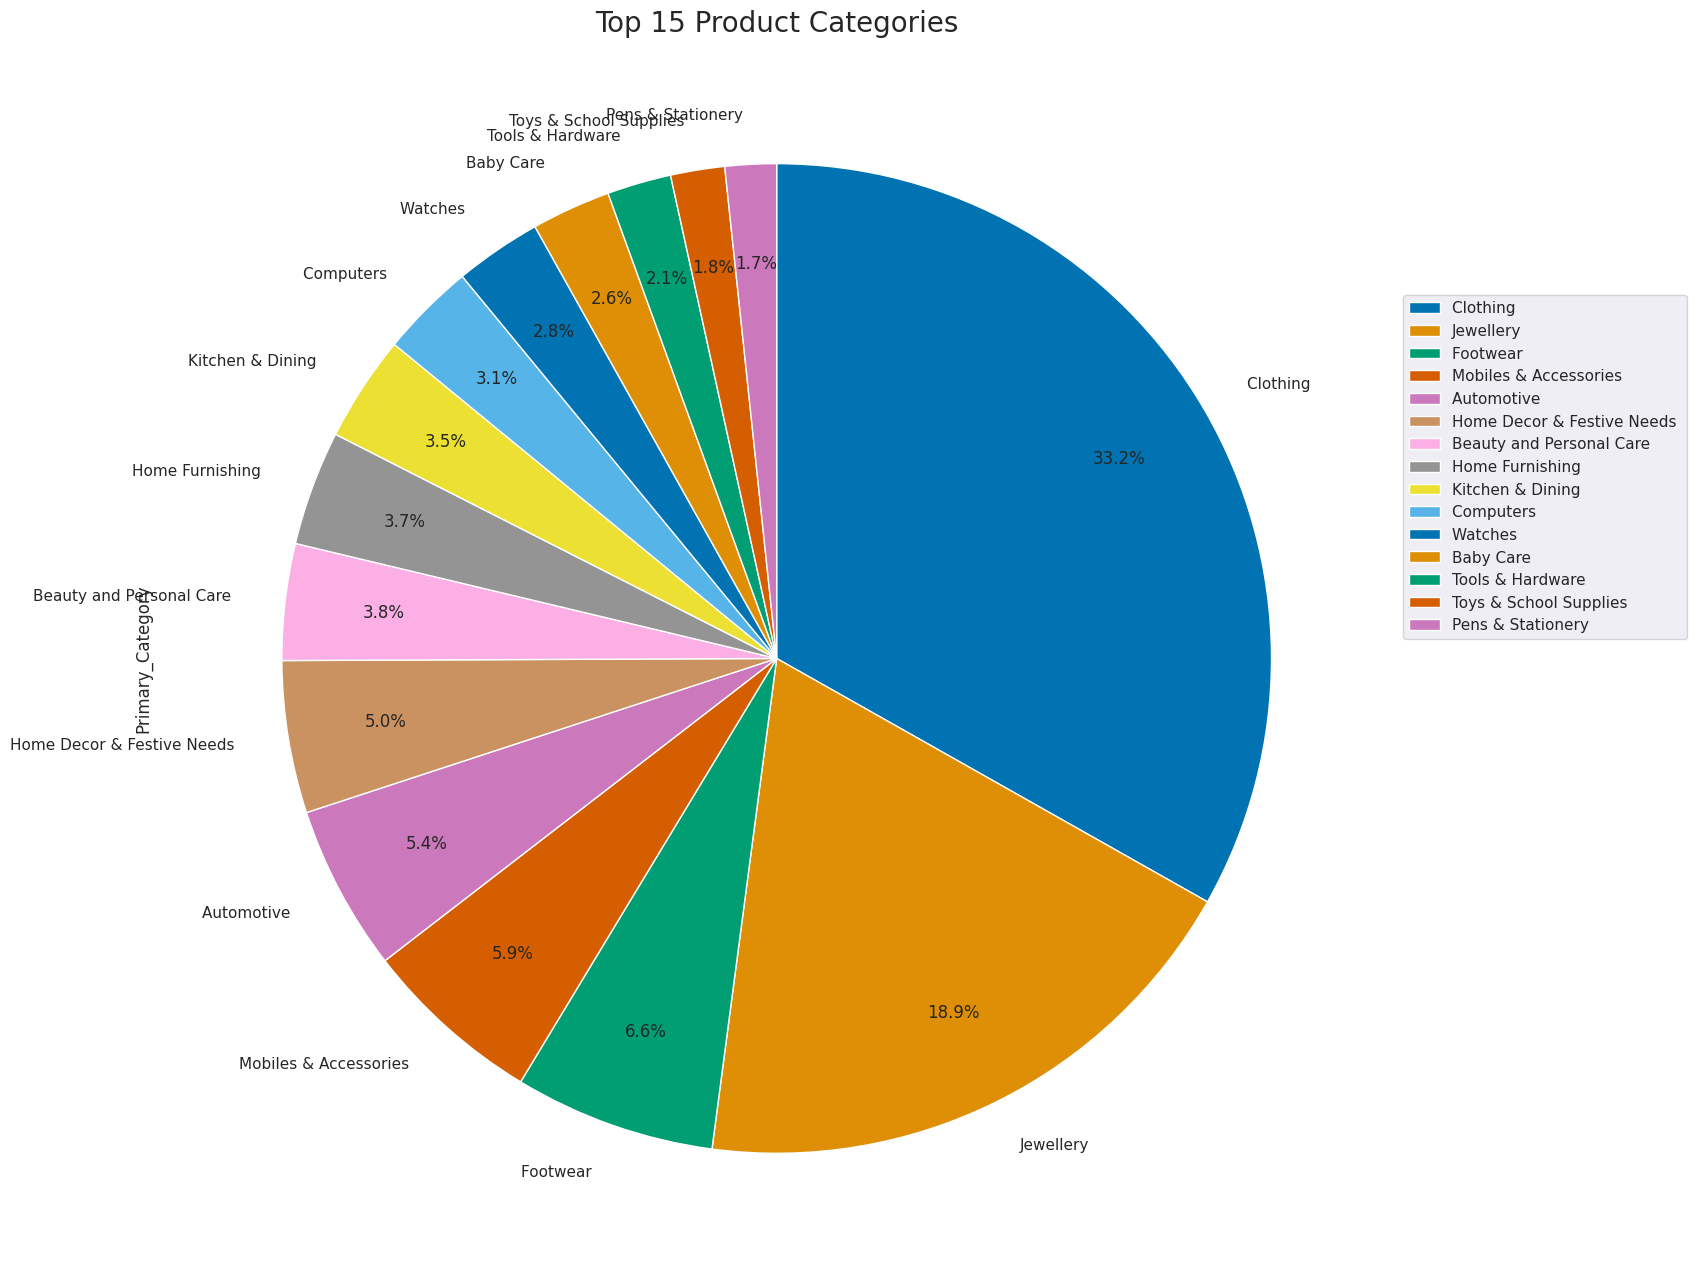

In [41]:
import seaborn as sns

plt.figure(figsize=(17,17))
sns.set(style="darkgrid")
sns.set_palette("colorblind")
sns.color_palette()
plt.title("Top 15 Product Categories", fontsize=20)
product_categories.plot.pie(y=product_categories.index, autopct='%1.1f%%', startangle=90, counterclock=False, pctdistance=0.8, labeldistance=1.1)
plt.legend(bbox_to_anchor=(1,0.8), loc="upper left")
plt.tight_layout()


In [42]:
# Using the aggregate function, create a DataFrame that groups categories together and allocates their mean and count.
Primary_Category_Discounts = pd.DataFrame(flipkart_df.groupby('Primary_Category').agg({
    'Discount%': [np.mean],
    'Primary_Category': ['count']
}))

Secondary_Category_Discounts = pd.DataFrame(flipkart_df.groupby('Secondary_Category').agg({
    'Discount%': [np.mean],
    'Secondary_Category': ['count']
}))

Tertiary_Category_Discounts = pd.DataFrame(flipkart_df.groupby('Tertiary_Category').agg({
    'Discount%': [np.mean],
    'Tertiary_Category': ['count']
}))

Quaternary_Category_Discounts = pd.DataFrame(flipkart_df.groupby('Quaternary_Category').agg({
    'Discount%': [np.mean],
    'Quaternary_Category': ['count']
}))

Primary_Category_Discounts.head()

,Discount%,Primary_Category
,mean,count
Primary_Category,,
"883 Police Full Sleeve Solid Men's Jacket""]",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""]",27.6,1
"ANAND ARCHIES Girls Flats""]",10.0,2
"ANAND ARCHIES Girls Wedges""]",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""]",0.0,1


We are going to combine the multiindex for visualization.

In [43]:
# We will use a loop to combine multiple indexes and reset the resulting index.
set1 = [Primary_Category_Discounts, Secondary_Category_Discounts,
           Tertiary_Category_Discounts, Quaternary_Category_Discounts]
for i in set1:
    i.columns = ['-'.join(col) for col in i.columns]
    i.reset_index(inplace=True)


# Let's consider the top 15 categories within each category.
# Let's sort the categories by their count.
Primary_Category_Discounts = Primary_Category_Discounts.sort_values(by='Primary_Category-count', ascending=False)[:15]
Secondary_Category_Discounts = Secondary_Category_Discounts.sort_values(by='Secondary_Category-count', ascending=False)[:15]
Tertiary_Category_Discounts = Tertiary_Category_Discounts.sort_values(by='Tertiary_Category-count', ascending=False)[:15]
Quaternary_Category_Discounts = Quaternary_Category_Discounts.sort_values(by='Quaternary_Category-count', ascending=False)[:15]

# Let's now sort the values by discounts.
Primary_Category_Discounts = Primary_Category_Discounts.sort_values('Discount%-mean', ascending=False)
Secondary_Category_Discounts = Secondary_Category_Discounts.sort_values('Discount%-mean', ascending=False)
Tertiary_Category_Discounts = Tertiary_Category_Discounts.sort_values('Discount%-mean', ascending=False)
Quaternary_Category_Discounts = Quaternary_Category_Discounts.sort_values('Discount%-mean', ascending=False)

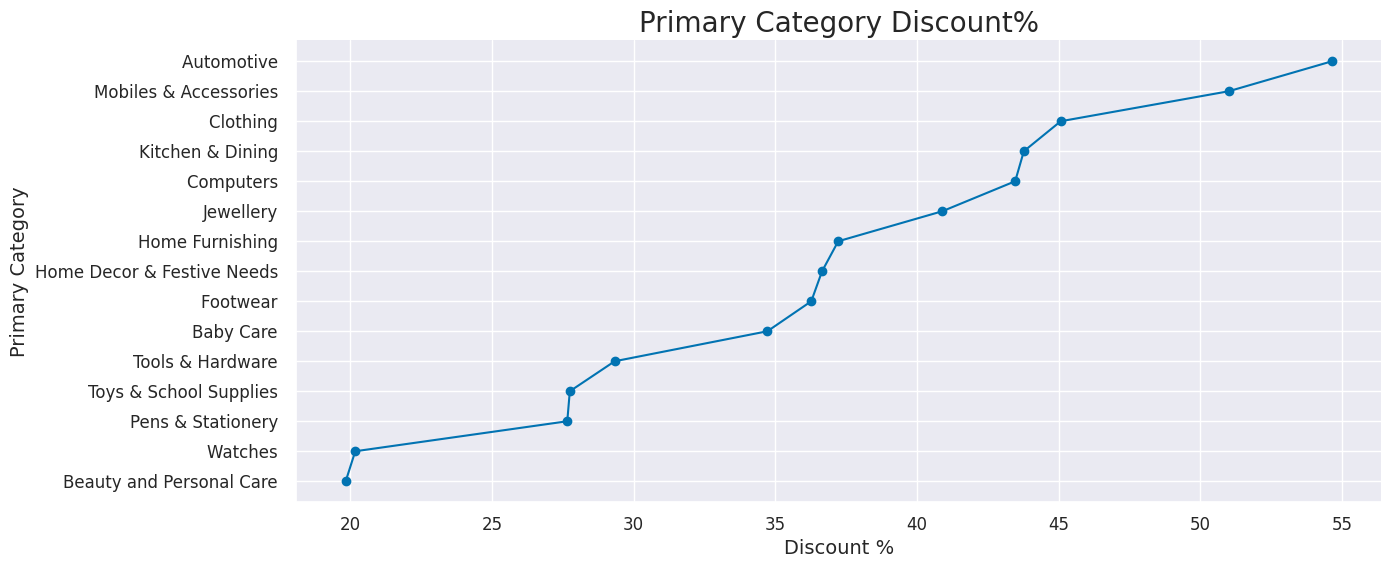

In [44]:
plt.figure(figsize=(14,6))
plt.title('Primary Category Discount%', fontsize=20)
# Create the line plot with markers
plt.plot(Primary_Category_Discounts['Discount%-mean'], Primary_Category_Discounts['Primary_Category'], marker='o')
# Customize the chart
plt.xlabel('Discount %', fontsize=14)
plt.ylabel('Primary Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Reverse the order of the y-axis
plt.gca().invert_yaxis()
plt.grid(True)
sns.despine()
# Show the plot
plt.show()

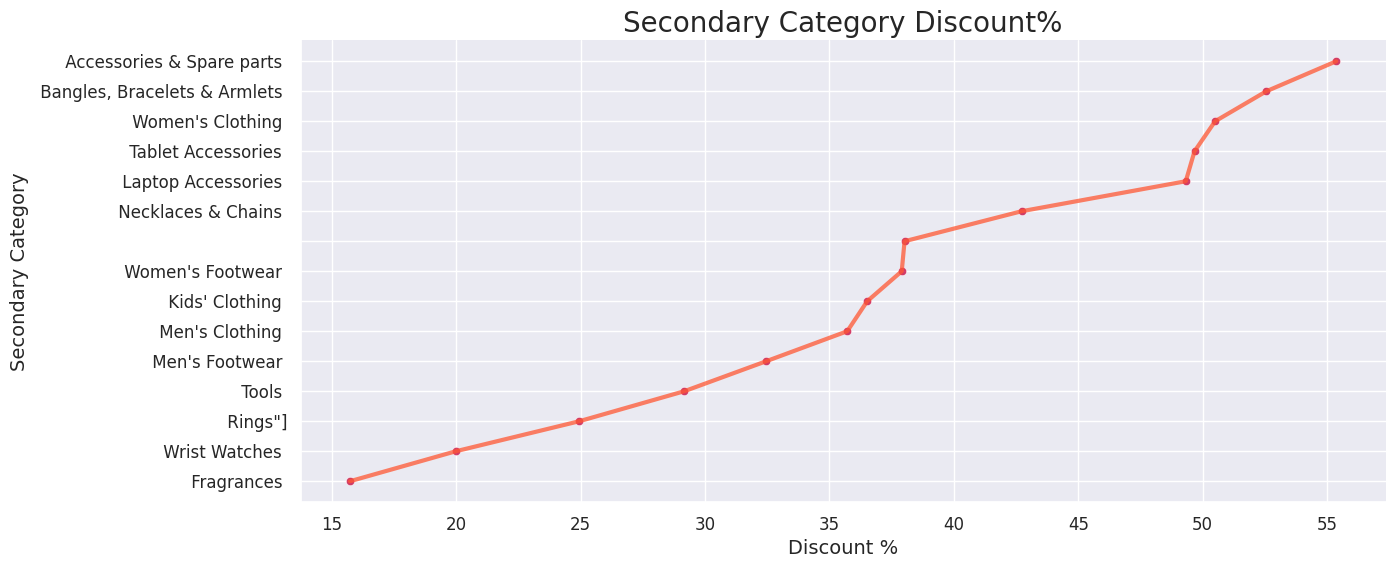

In [45]:
plt.figure(figsize=(14,6))
plt.title('Secondary Category Discount%', fontsize=20)
# Define custom colors for the line chart and scatter plot
colors = ['#FF5733', '#C70039', '#900C3F', '#581845']
# Use seaborn to create a line chart
sns.lineplot(x=Secondary_Category_Discounts['Discount%-mean'], y=Secondary_Category_Discounts['Secondary_Category'], alpha=0.75, linewidth=3, color=colors[0])
# Use seaborn to create a scatter plot with data points
sns.scatterplot(x=Secondary_Category_Discounts['Discount%-mean'], y=Secondary_Category_Discounts['Secondary_Category'], alpha=0.75, color=colors[1])
# Customize the chart
plt.xlabel('Discount %', fontsize=14)
plt.ylabel('Secondary Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
# Show the plot
plt.show()

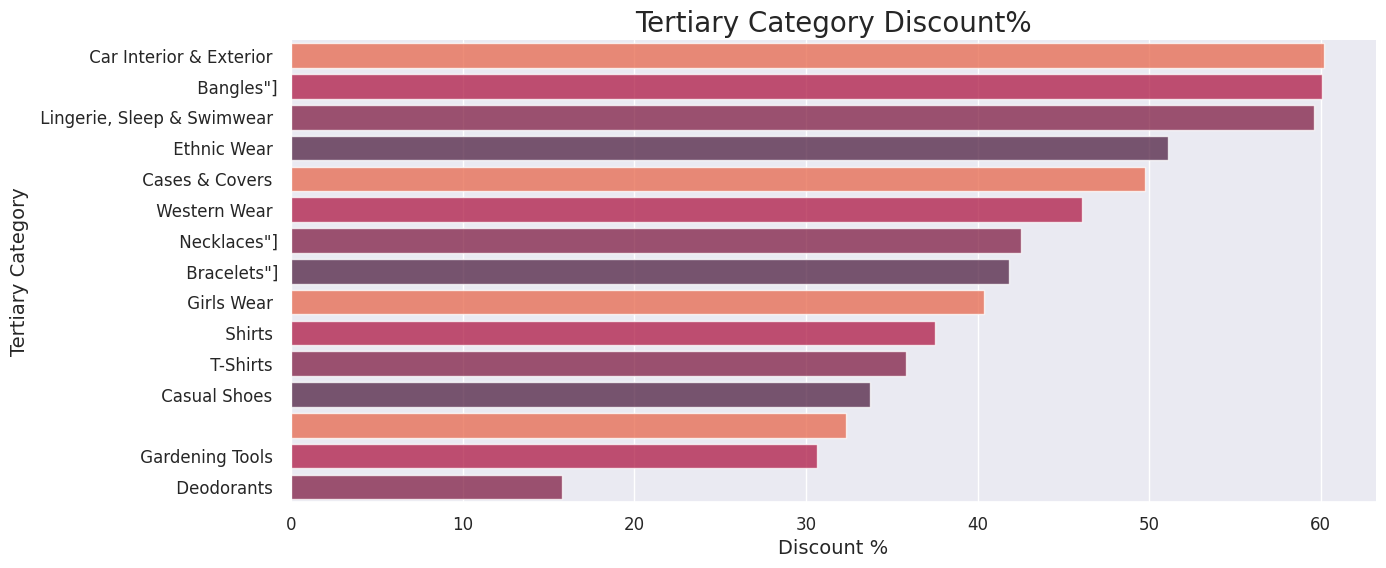

In [46]:
plt.figure(figsize=(14,6))
plt.title('Tertiary Category Discount%', fontsize=20)
# Define custom colors for the barplot
colors = ['#FF5733', '#C70039', '#900C3F', '#581845']
# Create the barplot
sns.barplot(x=Tertiary_Category_Discounts['Discount%-mean'], y=Tertiary_Category_Discounts['Tertiary_Category'], alpha=0.75, palette=colors)
# Customize the chart
plt.xlabel('Discount %', fontsize=14)
plt.ylabel('Tertiary Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

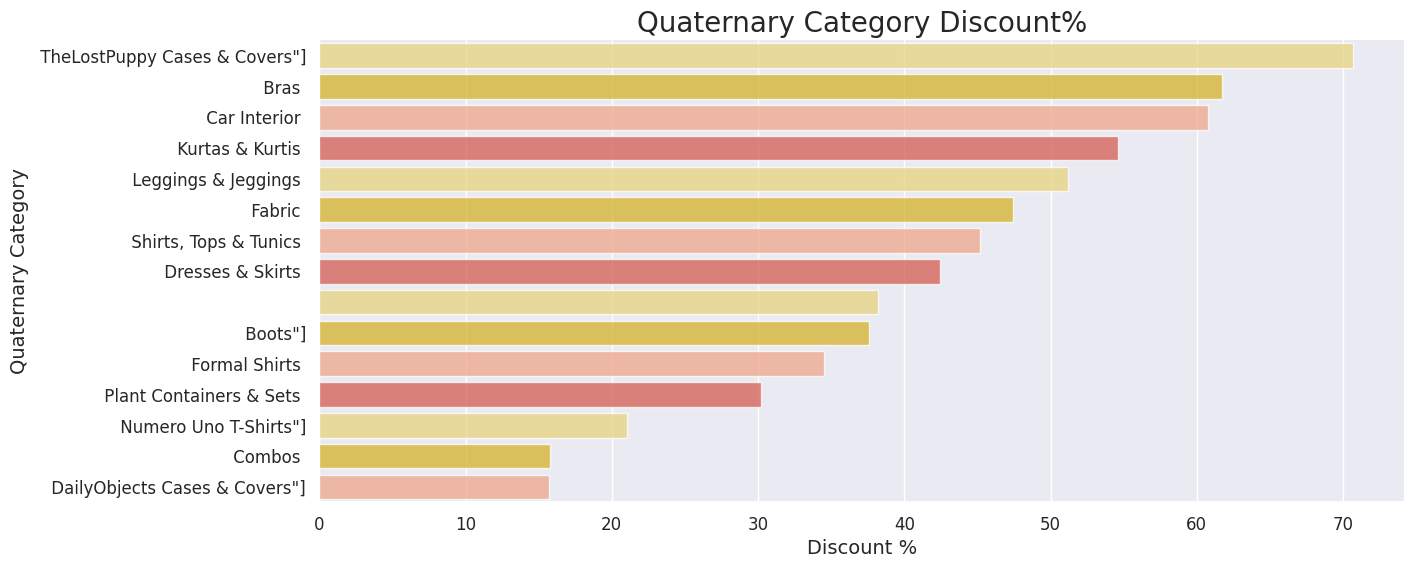

In [47]:
plt.figure(figsize=(14,6))
plt.title('Quaternary Category Discount%', fontsize=20)
# Define custom colors for the barplot
colors = ['#F7DC6F', '#F1C40F', '#FFA07A', '#E74C3C']
# Create the barplot with custom colors
sns.barplot(x=Quaternary_Category_Discounts['Discount%-mean'], y=Quaternary_Category_Discounts['Quaternary_Category'], alpha=0.75, palette=colors)
# Customize the chart
plt.xlabel('Discount %', fontsize=14)
plt.ylabel('Quaternary Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()

# **Conclusion**

- **Clothing, Jewelry, and Footwear are the most popular product categories.**
- **Sales in 2015 were higher compared to sales in 2016.**
- **Automotive, Mobiles & Accessories, and Clothing categories offer the highest discounts.**
- **December and January are peak months for sales, possibly due to the holiday season.**
- **Sales distribution is achieved periodically, on a yearly and monthly basis.**
- **The available data is of good quality, even with small amounts of missing data.**
- **The popularity of product categories can influence sales.**
- **Discounted prices can be a deciding factor for customers.**
- **Sales patterns can be analyzed on a yearly and monthly basis.**
- **Missing data can still allow for useful analysis of the available data.**

# **Thank you for your valuable time.**